In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
data_train_path = "image/train"
data_test_path = 'image/test'
data_val_path = "image/validation"

In [7]:
img_width = 180
img_height =180 

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names

In [10]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [11]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [12]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


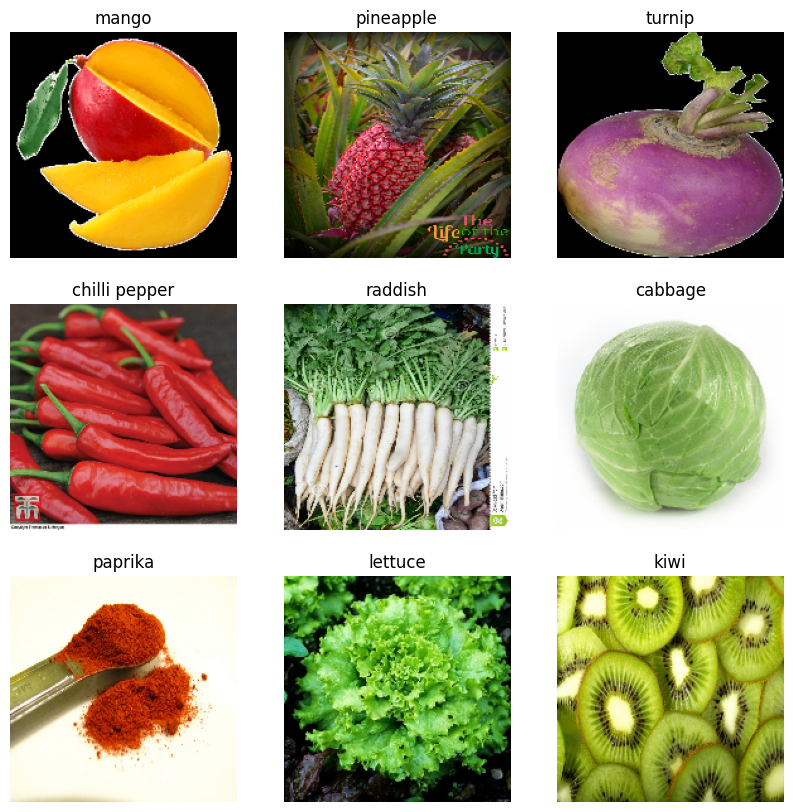

In [13]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 8
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.0633 - loss: 3.7150 - val_accuracy: 0.3077 - val_loss: 2.4787
Epoch 2/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.2676 - loss: 2.6030 - val_accuracy: 0.5299 - val_loss: 1.5612
Epoch 3/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3995 - loss: 2.0564 - val_accuracy: 0.7322 - val_loss: 1.0619
Epoch 4/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.5480 - loss: 1.5512 - val_accuracy: 0.8291 - val_loss: 0.6518
Epoch 5/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6725 - loss: 1.1483 - val_accuracy: 0.8803 - val_loss: 0.4765
Epoch 6/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.7700 - loss: 0.7560 - val_accuracy: 0.9003 - val_loss: 0.4112
Epoch 7/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8588 - loss: 0.4547 - val_accuracy: 0.9202 - val_loss: 0.4269
Epoch 8/8
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9100 - loss: 0.3156 - val_accuracy: 0.9373 - val_loss:

Text(0.5, 1.0, 'Loss')

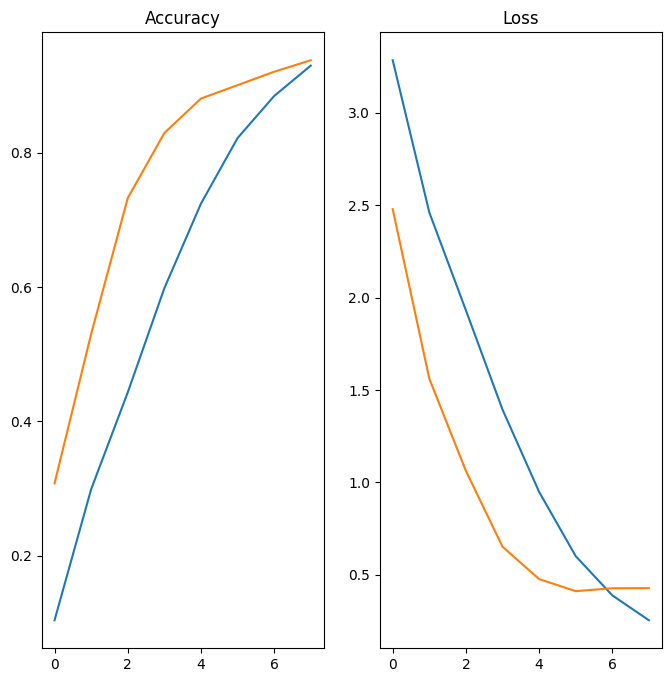

In [20]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [21]:
image ="C:/Jupyter notebook/image/validation/corn/Image_4.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [22]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [23]:
score = tf.nn.softmax(predict)

In [24]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 89.57


In [25]:
model.save('Image_classify.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
               precision    recall  f1-score   support

        apple       0.78      0.70      0.74        10
       banana       0.88      0.78      0.82         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.83      1.00      0.91        10
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.90      0.95        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.80     

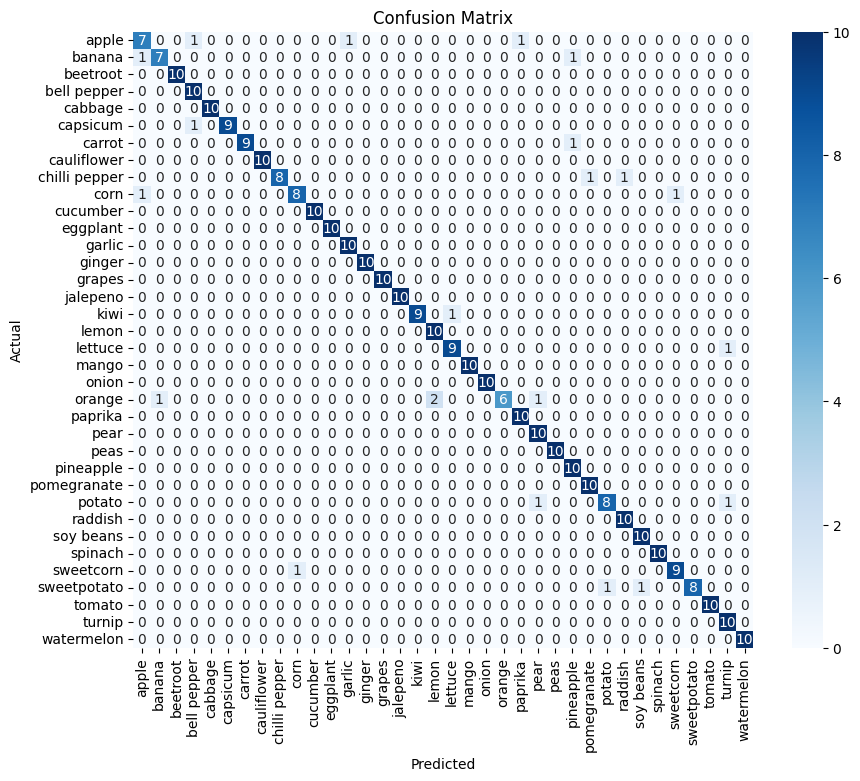

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test data
y_true = []
y_pred = []

for images, labels in data_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print(classification_report(y_true, y_pred, target_names=data_cat))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=data_cat, yticklabels=data_cat, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


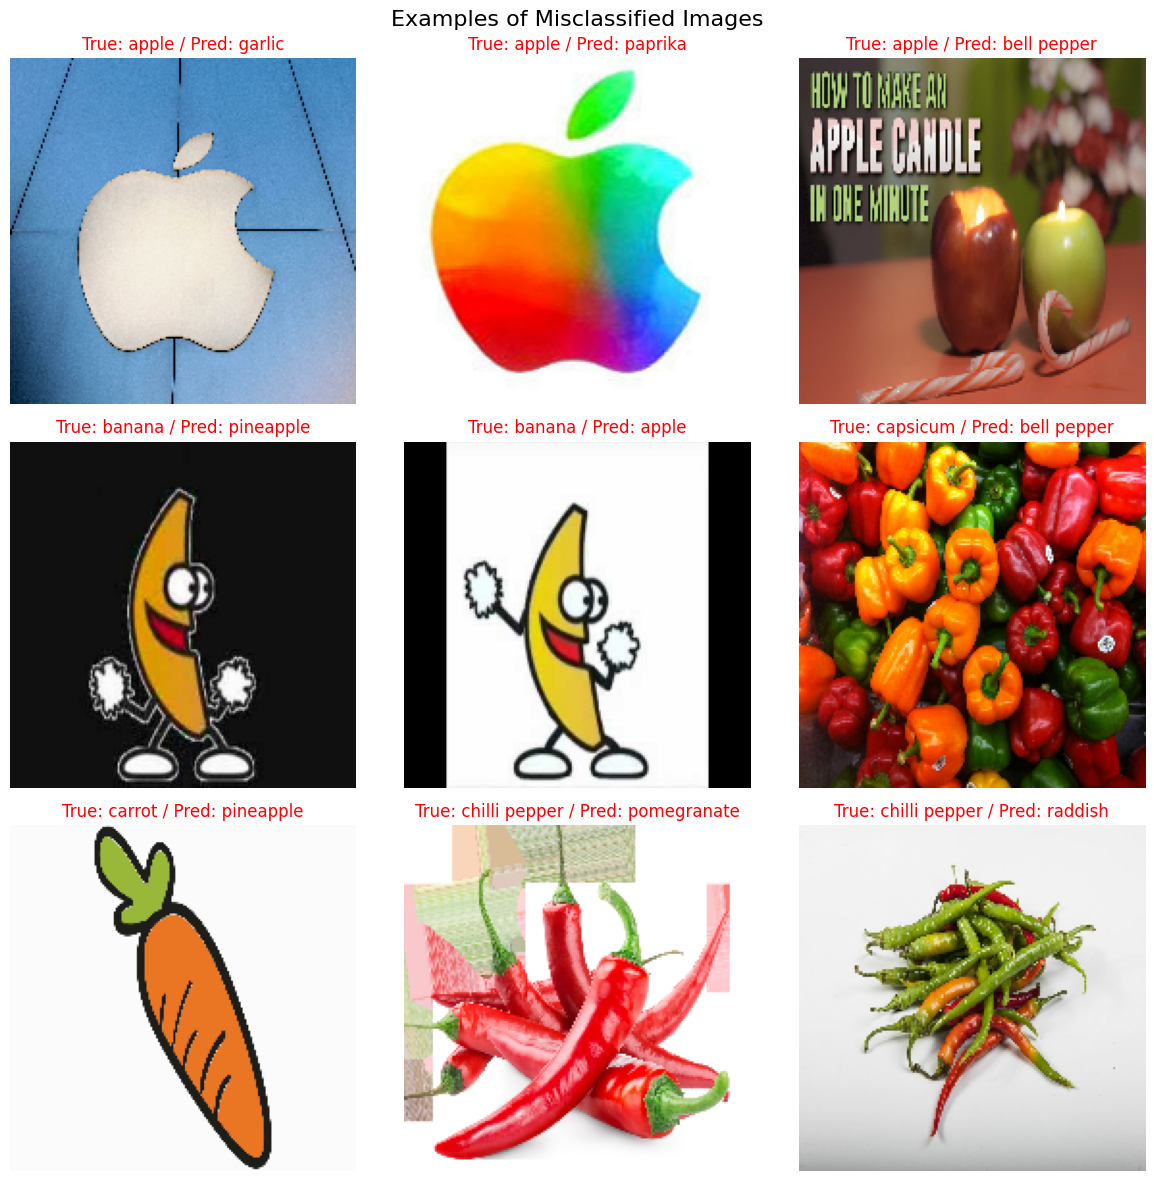

In [27]:
# Display misclassified images
wrong_images = []
wrong_preds = []
wrong_labels = []

for images, labels in data_test:
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    for i in range(len(labels)):
        if pred_labels[i] != labels[i]:
            wrong_images.append(images[i])
            wrong_preds.append(pred_labels[i])
            wrong_labels.append(labels[i])

# Show first 9 wrong predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(wrong_images[i].numpy().astype("uint8"))
    true_label = data_cat[wrong_labels[i]]
    pred_label = data_cat[wrong_preds[i]]
    plt.title(f"True: {true_label} / Pred: {pred_label}", color='red')
    plt.axis("off")
plt.suptitle("Examples of Misclassified Images", fontsize=16)
plt.tight_layout()
plt.show()

Filter shape: (3, 3, 3, 16)


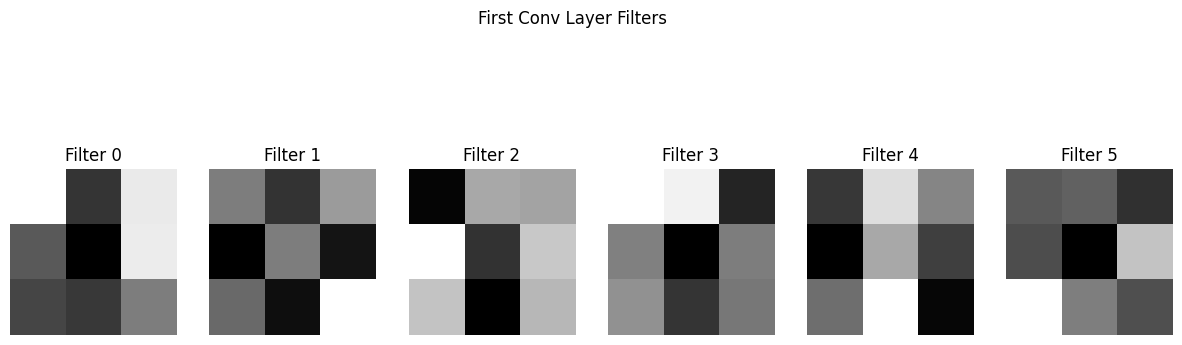

In [28]:
# Get the first conv layer weights
first_conv_layer = model.layers[1]
filters, biases = first_conv_layer.get_weights()
print("Filter shape:", filters.shape)  # (3, 3, 3, 16)

# Normalize filter values to 0-1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the filters
n_filters = 6
plt.figure(figsize=(15, 5))
for i in range(n_filters):
    f = filters[:, :, :, i]
    ax = plt.subplot(1, n_filters, i+1)
    plt.imshow(f[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i}')
plt.suptitle("First Conv Layer Filters")
plt.show()